<a href="https://colab.research.google.com/github/babybulat/ml-in-aesc-trial/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22task4_linreg_tune_practice_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тюнинг линейной регрессии и ошибки

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии

In [2]:
%pylab inline
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3. Зачем так делать? Когда вы проверяете себя на данных на которых не обучались, вы можете быть уверены что не переобучились. Таким образом если качество на 70% датасета (оубчающей выборке) растёт, а на тестовой выборке падает, то модель начала запоминать датасет (переобучилась), вы что-то делаете не так.


In [3]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(4 балла)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$).

Спойлер - при большом гиперпараметре регуляризации все параметры стремятся к нулю. На графике это должно быть видно.

In [4]:
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge, Lasso
import numpy as np

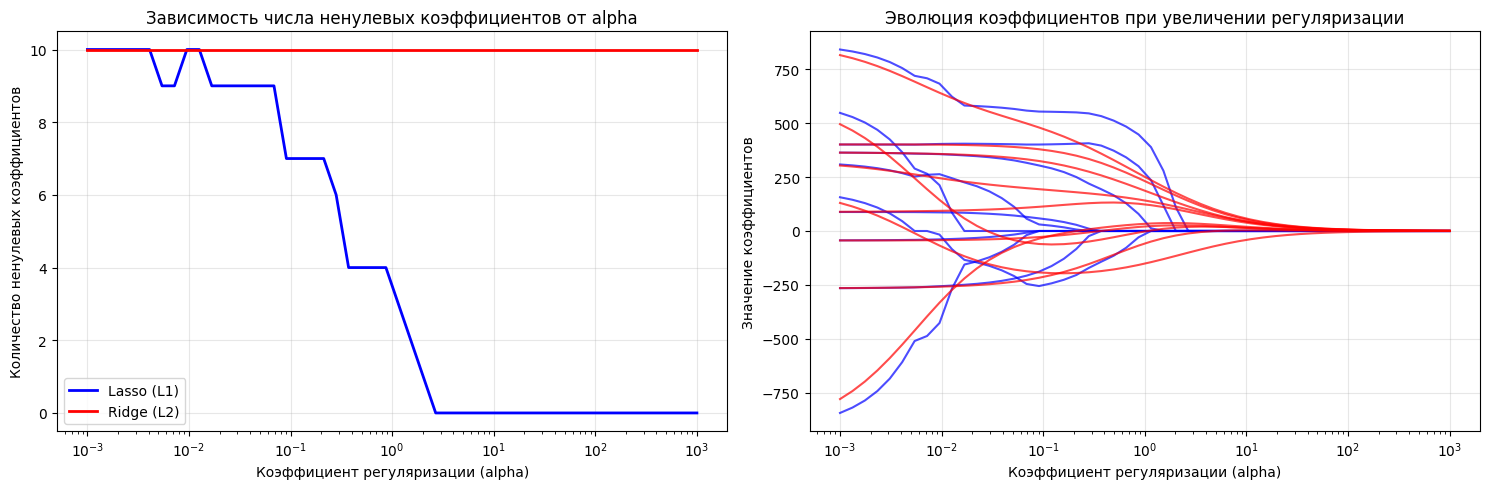

In [5]:

alpha_values = np.logspace(-3, 3, 50)

def count_near_zero_coefs(coefs, threshold=1e-4):
    return np.sum(np.abs(coefs) < threshold)

lasso_nonzero_counts = []
lasso_coefs_history = []

for alpha in alpha_values:
    lasso = Lasso(alpha=alpha, random_state=241)
    lasso.fit(X_train, y_train)
    coefs = lasso.coef_
    lasso_coefs_history.append(coefs)
    lasso_nonzero_counts.append(np.sum(np.abs(coefs) > 1e-4))


ridge_nonzero_counts = []
ridge_coefs_history = []

for alpha in alpha_values:
    ridge = Ridge(alpha=alpha, random_state=241)
    ridge.fit(X_train, y_train)
    coefs = ridge.coef_
    ridge_coefs_history.append(coefs)
    ridge_nonzero_counts.append(np.sum(np.abs(coefs) > 1e-4))


plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.semilogx(alpha_values, lasso_nonzero_counts, 'b-', label='Lasso (L1)', linewidth=2)
plt.semilogx(alpha_values, ridge_nonzero_counts, 'r-', label='Ridge (L2)', linewidth=2)
plt.xlabel('Коэффициент регуляризации (alpha)')
plt.ylabel('Количество ненулевых коэффициентов')
plt.title('Зависимость числа ненулевых коэффициентов от alpha')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
for i in range(X_train.shape[1]):
    lasso_coefs = [coefs[i] for coefs in lasso_coefs_history]
    plt.semilogx(alpha_values, lasso_coefs, 'b-', alpha=0.7)

for i in range(X_train.shape[1]):
    ridge_coefs = [coefs[i] for coefs in ridge_coefs_history]
    plt.semilogx(alpha_values, ridge_coefs, 'r-', alpha=0.7)

plt.xlabel('Коэффициент регуляризации (alpha)')
plt.ylabel('Значение коэффициентов')
plt.title('Эволюция коэффициентов при увеличении регуляризации')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [6]:
#from sklearn.cross_validation import cross_val_score
#from sklearn.cross_validation import cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
ridge = Ridge(alpha=1.0, random_state=241)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"RMSE : {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R² : {r2:.4f}")

RMSE : 58.3043
MAE : 49.6028
R² : 0.3599


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Оптимальные коэффициенты регуляризации:
По RMSE: alpha = 0.0870
По MAE:  alpha = 0.0215
По R²:   alpha = 0.0870


RMSE_OPT : 55.6391
MAE_OPT : 47.3174
R²_OPT : 0.4171




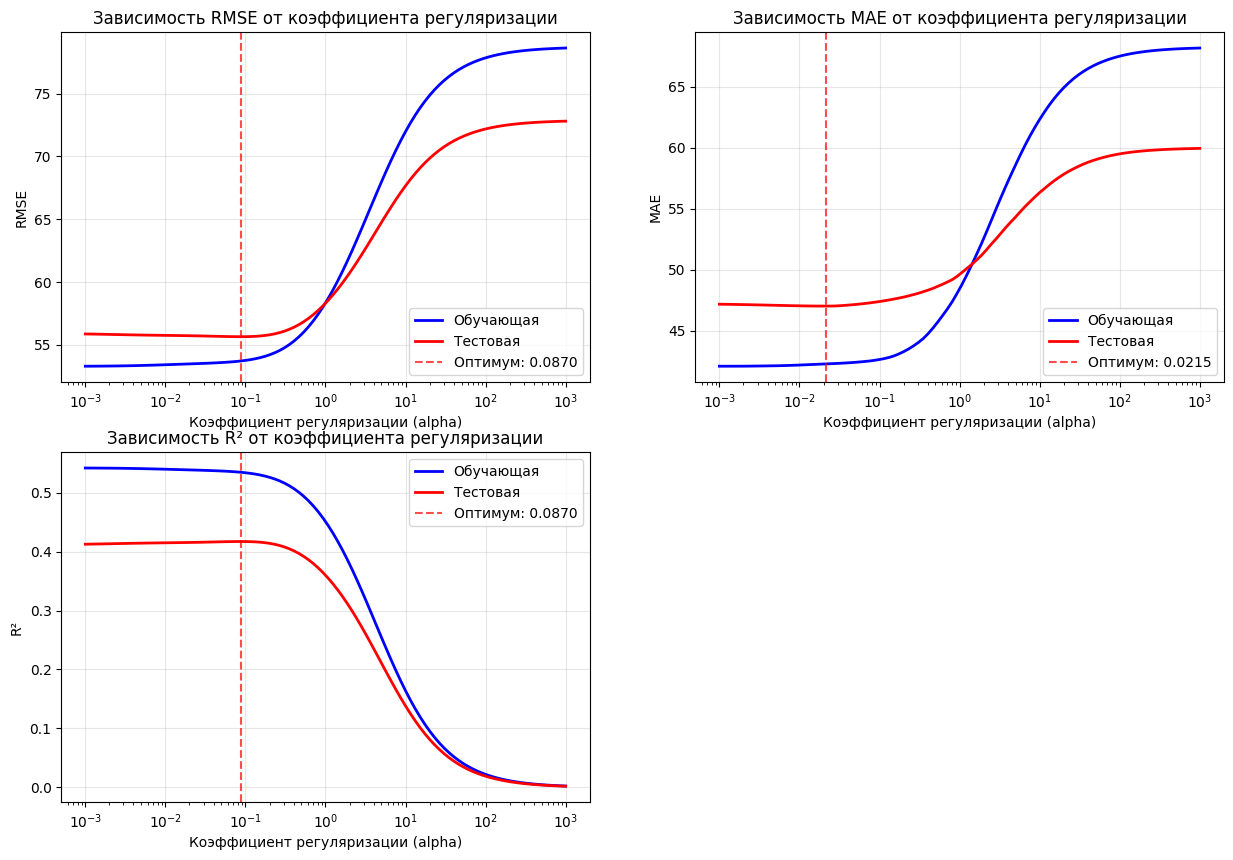

In [8]:
alpha_values = np.logspace(-3, 3, 100)

train_rmse, test_rmse = [], []
train_mae, test_mae = [], []
train_r2, test_r2 = [], []

for alpha in alpha_values:
    ridge = Ridge(alpha=alpha, random_state=241)
    ridge.fit(X_train, y_train)

    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)

    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    train_r2.append(r2_score(y_train, y_train_pred))

    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))
    test_r2.append(r2_score(y_test, y_test_pred))

best_alpha_rmse = alpha_values[np.argmin(test_rmse)]
best_alpha_mae = alpha_values[np.argmin(test_mae)]
best_alpha_r2 = alpha_values[np.argmax(test_r2)]

print("Оптимальные коэффициенты регуляризации:")
print(f"По RMSE: alpha = {best_alpha_rmse:.4f}")
print(f"По MAE:  alpha = {best_alpha_mae:.4f}")
print(f"По R²:   alpha = {best_alpha_r2:.4f}")

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.semilogx(alpha_values, train_rmse, 'b-', label='Обучающая', linewidth=2)
plt.semilogx(alpha_values, test_rmse, 'r-', label='Тестовая', linewidth=2)
plt.axvline(best_alpha_rmse, color='red', linestyle='--', alpha=0.7, label=f'Оптимум: {best_alpha_rmse:.4f}')
plt.xlabel('Коэффициент регуляризации (alpha)')
plt.ylabel('RMSE')
plt.title('Зависимость RMSE от коэффициента регуляризации')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.semilogx(alpha_values, train_mae, 'b-', label='Обучающая', linewidth=2)
plt.semilogx(alpha_values, test_mae, 'r-', label='Тестовая', linewidth=2)
plt.axvline(best_alpha_mae, color='red', linestyle='--', alpha=0.7, label=f'Оптимум: {best_alpha_mae:.4f}')
plt.xlabel('Коэффициент регуляризации (alpha)')
plt.ylabel('MAE')
plt.title('Зависимость MAE от коэффициента регуляризации')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.semilogx(alpha_values, train_r2, 'b-', label='Обучающая', linewidth=2)
plt.semilogx(alpha_values, test_r2, 'r-', label='Тестовая', linewidth=2)
plt.axvline(best_alpha_r2, color='red', linestyle='--', alpha=0.7, label=f'Оптимум: {best_alpha_r2:.4f}')
plt.xlabel('Коэффициент регуляризации (alpha)')
plt.ylabel('R²')
plt.title('Зависимость R² от коэффициента регуляризации')
plt.legend()
plt.grid(True, alpha=0.3)

ridge_optimized = Ridge(alpha=best_alpha_r2, random_state=241)
ridge_optimized.fit(X_train, y_train)
y_pred_optimized = ridge_optimized.predict(X_test)

rmse_optimized = np.sqrt(mean_squared_error(y_test, y_pred_optimized))
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print('\n')
print(f"RMSE_OPT : {rmse_optimized:.4f}")
print(f"MAE_OPT : {mae_optimized:.4f}")
print(f"R²_OPT : {r2_optimized:.4f}")
print('\n')


__Задание 2.__ Поиск объектов-выбросов

**(4 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

/tmp/ipython-input-374474953.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


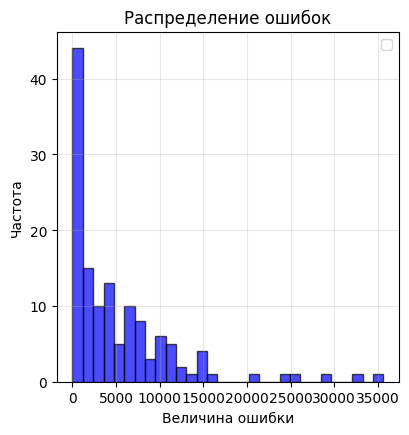

In [12]:
ridge1 = Ridge(alpha=best_alpha_r2, random_state=241)
ridge1.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
errors = y_test - y_pred
squared_errors = errors ** 2
absolute_errors = np.abs(errors)

plt.figure(figsize=(15, 10))


plt.subplot(2, 3, 1)
plt.hist(squared_errors, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Величина ошибки')
plt.ylabel('Частота')
plt.title('Распределение ошибок')
plt.legend()
plt.grid(True, alpha=0.3)

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [11]:
ridge_initial = Ridge(alpha=best_alpha_r2, random_state=241)
ridge_initial.fit(X_train, y_train)

y_train_pred = ridge_initial.predict(X_train)

squared_errors_init = (y_train - y_train_pred) ** 2


outliers_mask = squared_errors_init >= 20000
X_train_clean = X_train[~outliers_mask]
y_train_clean = y_train[~outliers_mask]

ridge_clean = Ridge(alpha=best_alpha_r2, random_state=241)
ridge_clean.fit(X_train_clean, y_train_clean)

y_pred_clean = ridge_clean.predict(X_test)

rmse_clean = np.sqrt(mean_squared_error(y_test, y_pred_clean))
mae_clean = mean_absolute_error(y_test, y_pred_clean)
r2_clean = r2_score(y_test, y_pred_clean)


print(f"RMSE : {rmse_clean:.4f}")
print(f"MAE : {mae_clean:.4f}")
print(f"R² : {r2_clean:.4f}")





RMSE : 55.5951
MAE : 47.2081
R² : 0.4180


__Задание 3.__ Отчёт

**(2 балла)**

В этом задании мы обучили две регрессии. Для одной из них мы подобрали оптимальные коэфициенты регуляризации с помощью. Также убрали выбросы , что не сильно улучшило ошибку. Скорее не изменило даже.